In [49]:
%matplotlib inline
# Video Games/ Genre. Find a similar

In [50]:
import pandas as pd
import csv
import scipy.spatial.distance
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [51]:
# Build publisher_genre dictionary
publisher_genre = {}

with open("vgsales.csv", "r", encoding="utf-8") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        publisher = row['Publisher']
        genre = row['Genre']
        if publisher not in publisher_genre:
            publisher_genre[publisher] = {}
        if genre not in publisher_genre[publisher]:
            publisher_genre[publisher][genre] = 0
        publisher_genre[publisher][genre] += 1



In [58]:
# Step 2: Convert dictionary to DataFrame
df = pd.DataFrame.from_dict(publisher_genre, orient='index').fillna(0)

# Step 3: Compute cosine similarity matrix
cos_sim = cosine_similarity(df)

# Step 4: Convert similarity matrix back to a readable DataFrame
similarity_df = pd.DataFrame(cos_sim, index=df.index, columns=df.index)

similarity_df

,Nintendo,Microsoft Game Studios,Take-Two Interactive,Sony Computer Entertainment,Activision,Ubisoft,Bethesda Softworks,Electronic Arts,Sega,SquareSoft,...,PopTop Software,Glams,Team17 Software,Kool Kizz,Sunflowers,Strategy First,New World Computing,EON Digital Entertainment,Ascaron Entertainment,Interchannel-Holon
Nintendo,1.000000,0.754952,0.532268,0.845862,0.672796,0.798542,0.563865,0.476427,0.829968,0.500427,...,0.137730,0.137730,0.137730,0.137730,0.137730,0.137730,0.137730,0.137730,0.137730,0.137730
Microsoft Game Studios,0.754952,1.000000,0.671690,0.861260,0.784226,0.883496,0.716650,0.629274,0.801353,0.330415,...,0.280124,0.280124,0.280124,0.280124,0.280124,0.280124,0.280124,0.280124,0.280124,0.280124
Take-Two Interactive,0.532268,0.671690,1.000000,0.803351,0.849552,0.689673,0.620853,0.939263,0.883759,0.115232,...,0.113446,0.113446,0.113446,0.113446,0.113446,0.113446,0.113446,0.113446,0.113446,0.113446
Sony Computer Entertainment,0.845862,0.861260,0.803351,1.000000,0.825215,0.863947,0.578350,0.759731,0.943924,0.276164,...,0.050468,0.050468,0.050468,0.050468,0.050468,0.050468,0.050468,0.050468,0.050468,0.050468
Activision,0.672796,0.784226,0.849552,0.825215,1.000000,0.886112,0.788448,0.699217,0.849980,0.150643,...,0.054124,0.054124,0.054124,0.054124,0.054124,0.054124,0.054124,0.054124,0.054124,0.054124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Strategy First,0.137730,0.280124,0.113446,0.050468,0.054124,0.090624,0.060275,0.057576,0.161174,0.103695,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
New World Computing,0.137730,0.280124,0.113446,0.050468,0.054124,0.090624,0.060275,0.057576,0.161174,0.103695,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EON Digital Entertainment,0.137730,0.280124,0.113446,0.050468,0.054124,0.090624,0.060275,0.057576,0.161174,0.103695,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Ascaron Entertainment,0.137730,0.280124,0.113446,0.050468,0.054124,0.090624,0.060275,0.057576,0.161174,0.103695,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
index = publisher_genre.keys()

rows = [publisher_genre[k] for k in index]

df = pd.DataFrame(rows,index = index)

df = df.fillna(0)

df

,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Fighting,Action,Adventure,Strategy
Nintendo,55.0,112.0,37.0,106.0,74.0,100.0,26.0,29.0,18.0,79.0,35.0,32.0
Microsoft Game Studios,17.0,6.0,22.0,16.0,1.0,34.0,28.0,18.0,5.0,21.0,3.0,18.0
Take-Two Interactive,151.0,11.0,20.0,6.0,1.0,27.0,65.0,4.0,1.0,93.0,12.0,22.0
Sony Computer Entertainment,124.0,66.0,65.0,49.0,12.0,128.0,51.0,15.0,30.0,90.0,41.0,12.0
Activision,144.0,60.0,74.0,41.0,7.0,103.0,159.0,23.0,7.0,310.0,25.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Inti Creates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Takuyo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Interchannel-Holon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Rain Games,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
df_norm = df.divide(df.sum(axis=1), axis=0)
df_norm

,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Fighting,Action,Adventure,Strategy
Nintendo,0.078236,0.159317,0.052632,0.150782,0.105263,0.142248,0.036984,0.041252,0.025605,0.112376,0.049787,0.045519
Microsoft Game Studios,0.089947,0.031746,0.116402,0.084656,0.005291,0.179894,0.148148,0.095238,0.026455,0.111111,0.015873,0.095238
Take-Two Interactive,0.365617,0.026634,0.048426,0.014528,0.002421,0.065375,0.157385,0.009685,0.002421,0.225182,0.029056,0.053269
Sony Computer Entertainment,0.181552,0.096633,0.095168,0.071742,0.017570,0.187408,0.074671,0.021962,0.043924,0.131772,0.060029,0.017570
Activision,0.147692,0.061538,0.075897,0.042051,0.007179,0.105641,0.163077,0.023590,0.007179,0.317949,0.025641,0.022564
...,...,...,...,...,...,...,...,...,...,...,...,...
Inti Creates,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Takuyo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
Interchannel-Holon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Rain Games,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [60]:
# Step 4: Choose a target publisher and check existence
target_pub_id = 'Electronic Arts'

if target_pub_id in df_norm.index:
    target_pub = df_norm.loc[target_pub_id]

    # Step 5: Compute cosine distances
    distances = scipy.spatial.distance.cdist(df_norm, [target_pub], metric='cosine').flatten()
    query_distances = list(zip(df_norm.index, distances))

    # Step 6: Sort and get top 10 similar (excluding self)
    top_similar = sorted(query_distances, key=lambda x: x[1])
    top_similar = [pub for pub in top_similar if pub[0] != target_pub_id][:10]

    # Output the result
    print(f"Top 10 publishers similar to {target_pub_id}:\n")
    for pub, dist in top_similar:
        print(f"{pub}: Similarity = {1 - dist:.4f}")
else:
    print(f"Publisher '{target_pub_id}' not found in the dataset.")


Top 10 publishers similar to Electronic Arts:

989 Studios: Similarity = 0.9457
Gremlin Interactive Ltd: Similarity = 0.9410
Take-Two Interactive: Similarity = 0.9393
Konami Digital Entertainment: Similarity = 0.9330
Activision Value: Similarity = 0.9134
Alternative Software: Similarity = 0.9119
RTL: Similarity = 0.9080
Midway Games: Similarity = 0.9066
Mastiff: Similarity = 0.8835
UEP Systems: Similarity = 0.8730


In [56]:
# Build graph
G = nx.Graph()

# Add target node
G.add_node(target_pub_id)

# Add nodes and edges for top similar publishers
for similar_pub_id, distance in top_similar:
    if similar_pub_id != target_pub_id:
        G.add_node(similar_pub_id)
        G.add_edge(target_pub_id, similar_pub_id, weight=1 - distance)  # Invert distance for strength


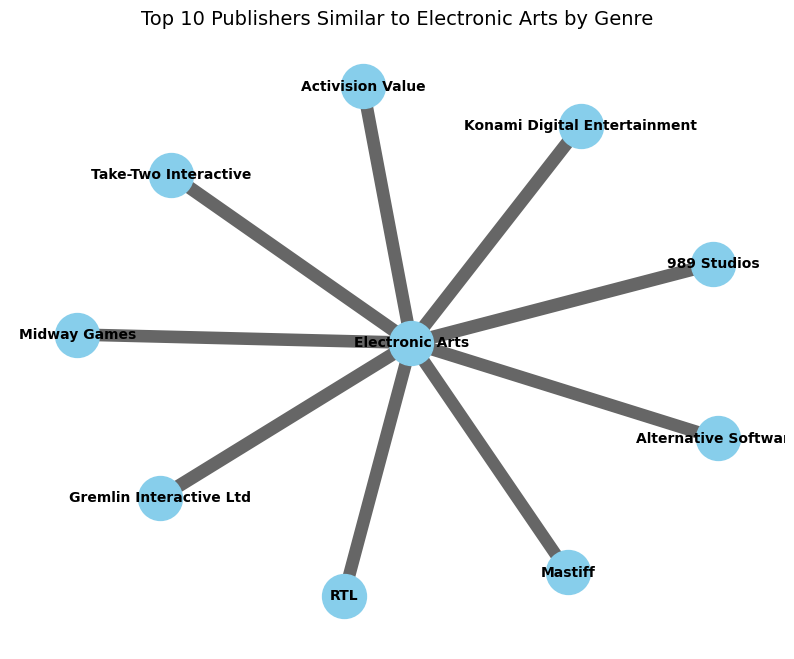

In [57]:
# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Better layout

edge_weights = [G[u][v]['weight'] * 10 for u, v in G.edges()]  # Scale for visibility

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1000)
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
plt.title(f"Top 10 Publishers Similar to {target_pub_id} by Genre", fontsize=14)
plt.axis('off')
plt.show()